In [1]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [5]:
col_names=['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','type']
ds=pd.read_csv('/home/dslab/Downloads/zoo.data',header=None,names=col_names)
ds.head()
x=ds.values[:,:16]
y=ds.values[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)



In [6]:
dt=DecisionTreeClassifier()
dt=dt.fit(x_train,y_train)


In [7]:
y_pred=dt.predict(x_test)
print("accuracy :",metrics.accuracy_score(y_test,y_pred))

accuracy : 0.9523809523809523


In [8]:

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

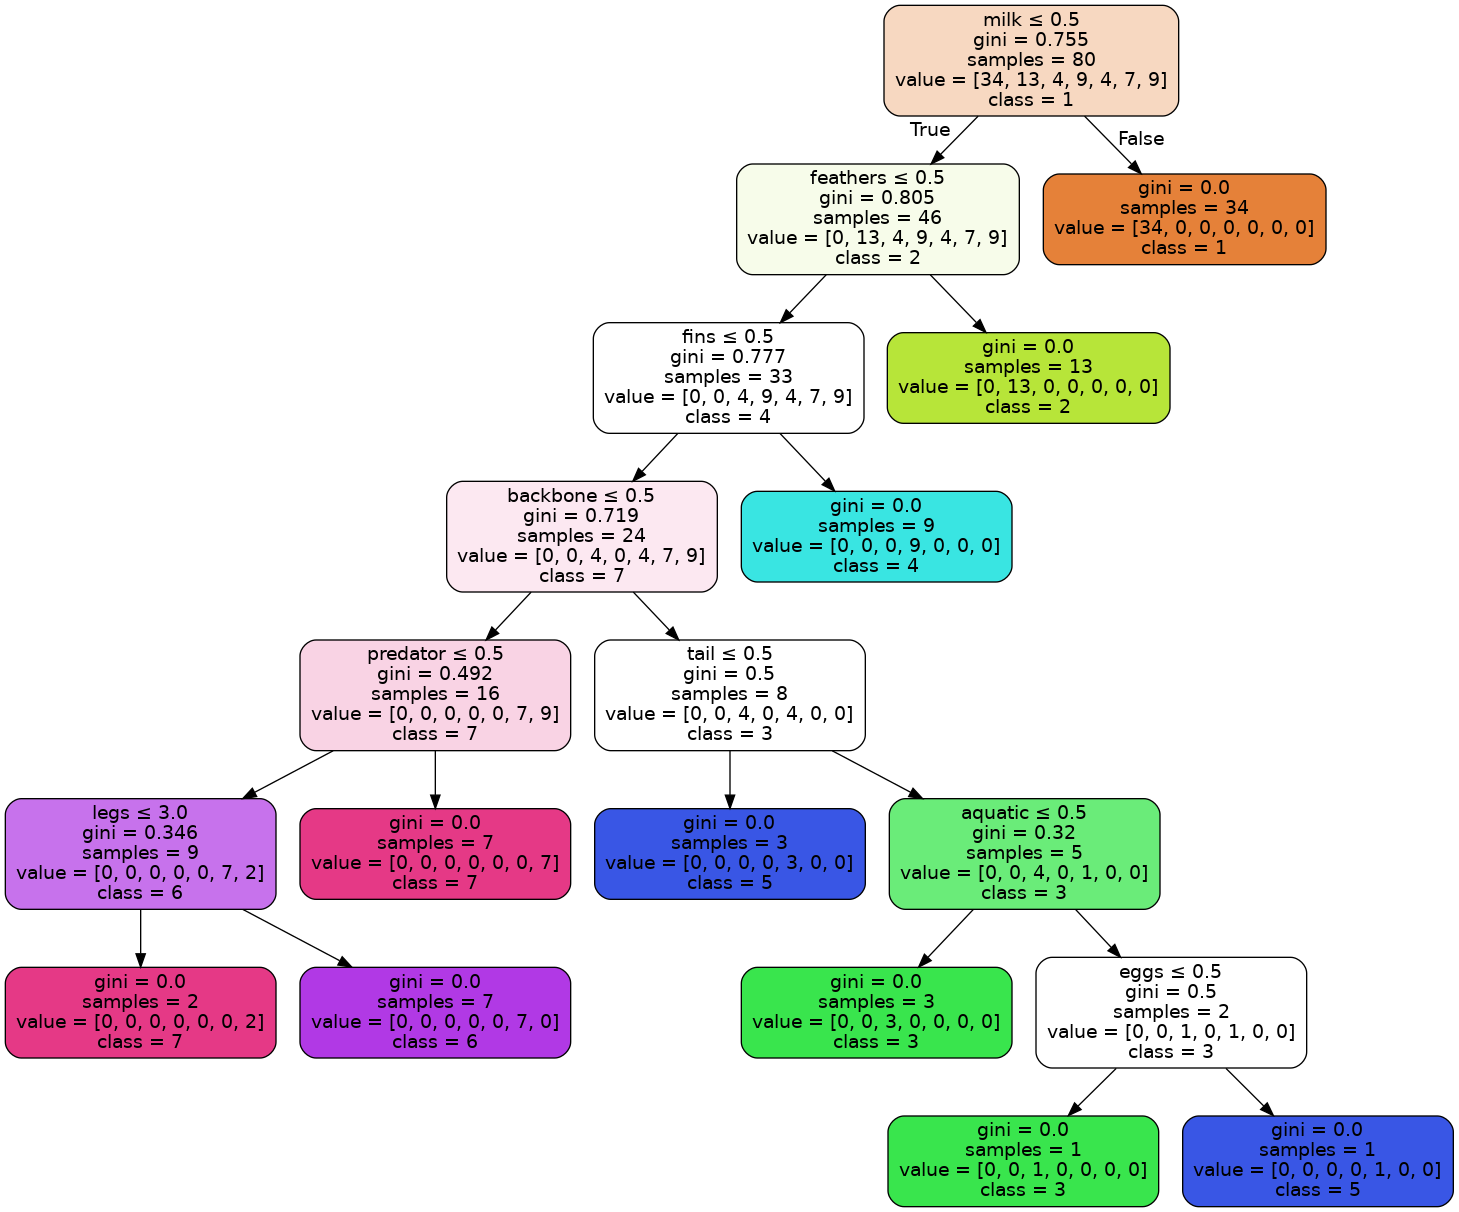

In [10]:

feature_cols=['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize']
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['1','2','3','4','5','6','7'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('zoo.png')
Image(graph.create_png())